911 Calls Capstone Project

In [1]:
# For this capstone project we will be analyzing some 911 call data from Kaggle. 
# The data contains the following fields:

# lat : String variable, Latitude
# lng: String variable, Longitude
# desc: String variable, Description of the Emergency Call
# zip: String variable, Zipcode
# title: String variable, Title
# timeStamp: String variable, YYYY-MM-DD HH:MM:SS
# twp: String variable, Township
# addr: String variable, Address
# e: String variable, Dummy variable (always 1)

In [2]:
# Import numpy and pandas
import numpy as np
import pandas as pd

In [3]:
# Import visualization libraries and set %matplotlib inline.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Read in the csv file as a dataframe called df
df = pd.read_csv('911.csv')

In [5]:
# Check the info() of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
lat          663522 non-null float64
lng          663522 non-null float64
desc         663522 non-null object
zip          583323 non-null float64
title        663522 non-null object
timeStamp    663522 non-null object
twp          663229 non-null object
addr         663522 non-null object
e            663522 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [6]:
# Check the head of df
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
# What are the top 5 zipcodes for 911 calls?
df['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [8]:
# What are the top 5 townships (twp) for 911 calls?
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [9]:
# Take a look at the 'title' column, how many unique title codes are there?
df['title'].nunique()

148

In [10]:
# In the titles column there are "Reasons/Departments" specified before the title code. 
# These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to 
# create a new column called "Reason" that contains this string value.

# For example, if the title column value is EMS: BACK PAINS/INJURY , 
# the Reason column value would be EMS.

In [11]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [12]:
df['title'].iloc[0]

'EMS: BACK PAINS/INJURY'

In [13]:
df['title'].iloc[0].split(':')[0]

'EMS'

In [14]:
df['reason'] = df['title'].apply(lambda t: t.split(':')[0])

In [15]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [16]:
# What is the most common Reason for a 911 call based off of this new column?
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

Text(0.5,0,'Reason for Call')

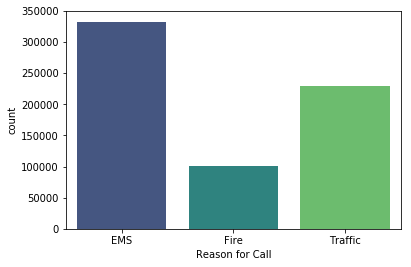

In [17]:
# Now use seaborn to create a countplot of 911 calls by Reason.
ax = sns.countplot(x='reason', data=df, palette='viridis')
ax.set_xlabel('Reason for Call')

In [18]:
# Now let us begin to focus on time information. 
# What is the data type of the objects in the timeStamp column?
type(df['timeStamp'].iloc[0])

str

In [19]:
# You should have seen that these timestamps are still strings. 
# Use pd.to_datetime to convert the column from strings to DateTime objects.
df['timeStamp'] = df['timeStamp'].apply(pd.to_datetime)

In [20]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
# You can now grab specific attributes from a Datetime object by calling them. For example:
time = df.iloc[0]['timeStamp']
time

Timestamp('2015-12-10 17:10:52')

In [22]:
# You can use Jupyter's tab method to explore the various attributes you can call.
print(time.year)
print(time.month)
print(time.day)
print(time.dayofweek)
print(time.hour)
print(time.minute)
print(time.second)

2015
12
10
3
17
10
52


In [23]:
# Now that the timestamp column are actually DateTime objects, 
# use .apply() to create 3 new columns called Hour, Month, and Day of Week. 
# You will create these columns based off of the timeStamp column.

df['hour'] = df['timeStamp'].apply(lambda time : time.hour)
df['month'] = df['timeStamp'].apply(lambda time : time.month)
df['dayofweek'] = df['timeStamp'].apply(lambda time : time.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [24]:
# Notice how the Day of Week is an integer 0-6. Use the .map() 
# with this dictionary to map the actual string names to the day of the week:

dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['dayofweek'] = df['dayofweek'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


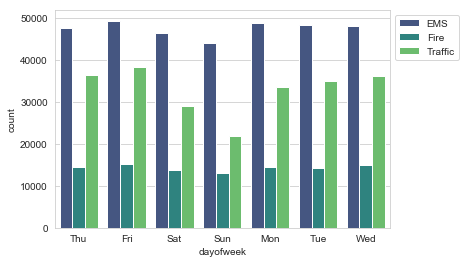

In [25]:
# Now use seaborn to create a countplot of the Day of Week column 
# with the hue based off of the Reason column.
sns.set_style('whitegrid')
sns.countplot(x='dayofweek', data=df, hue='reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.0, 1.0))

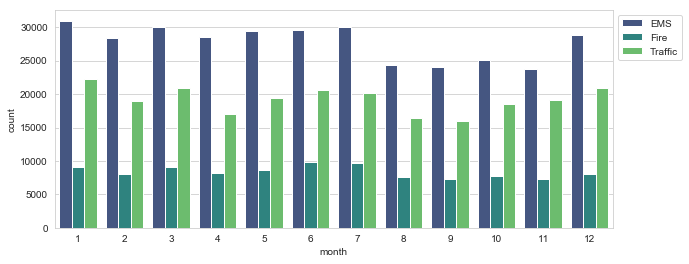

In [26]:
# Now do the same for Month:
plt.figure(figsize=(10, 4))
sns.countplot(x='month', data=df, hue='reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [27]:
# Did you notice something strange about the Plot?

# You should have noticed it was missing some Months, 
# let's see if we can maybe fill in this information by 
# plotting the information in another way, possibly a simple 
# line plot that fills in the missing months, 
# in order to do this, we'll need to do some work with pandas...

# Note: In this dataset all Months are present

In [28]:
# Now create a gropuby object called byMonth, 
# where you group the DataFrame by the month column 
# and use the count() method for aggregation. 
# Use the head() method on this returned DataFrame.

byMonth = df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,dayofweek
month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


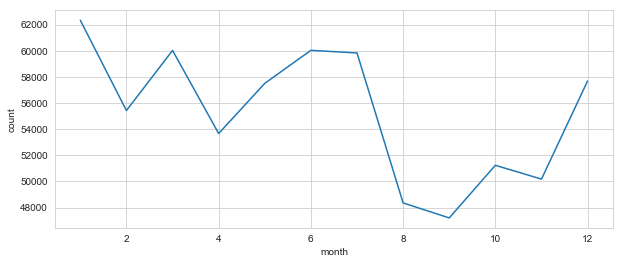

In [29]:
# Now create a simple plot off of the dataframe indicating the count of calls per month.
plt.figure(figsize=(10, 4))
plt.ylabel('count')
sns.lineplot(x=byMonth.index, y='lat', data=byMonth) # if we have latitude of the call then call actually took place

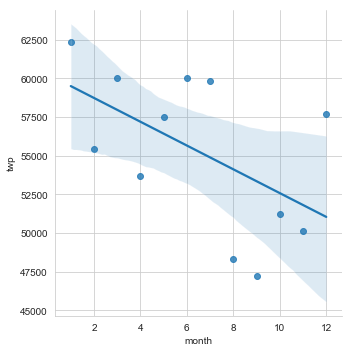

In [30]:
# Now see if you can use seaborn's lmplot() to create a 
# linear fit on the number of calls per month. 
# Keep in mind you may need to reset the index to a column.
byMonth = byMonth.reset_index()
sns.lmplot(x='month', y='twp', data=byMonth)

In [31]:
# Create a new column called 'Date' that contains the date 
# from the timeStamp column. You'll need to use apply along with the .date() method.
t = df['timeStamp'].iloc[0]
t

Timestamp('2015-12-10 17:10:52')

In [32]:
t.date()

datetime.date(2015, 12, 10)

In [33]:
df['date'] = df['timeStamp'].apply(lambda ts : ts.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


In [34]:
# Now groupby this Date column with the count() aggregate 
# and create a plot of counts of 911 calls.
byDate = df.groupby('date')
byDate.count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek
date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


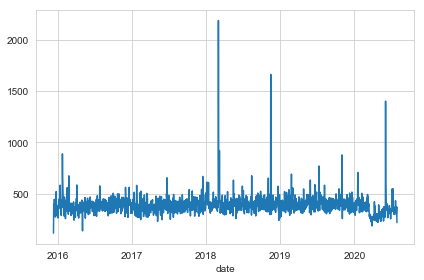

In [35]:
byDate['lat'].count().plot()
plt.tight_layout()

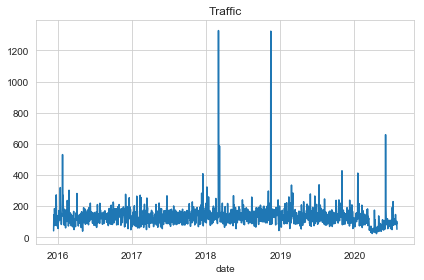

In [36]:
# Now recreate this plot but create 3 separate plots with each plot 
# representing a Reason for the 911 call
dfTraffic = df[df['reason'] == 'Traffic']
dfTraffic = dfTraffic.groupby('date')
dfTraffic['lat'].count().plot()
plt.title('Traffic')
plt.tight_layout()

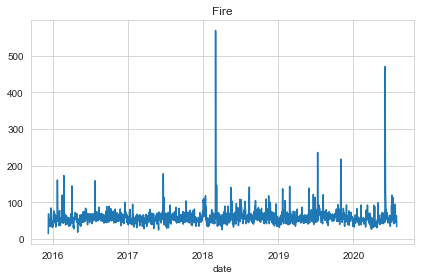

In [37]:
dfFire = df[df['reason'] == 'Fire']
dfFire = dfFire.groupby('date')
dfFire.count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

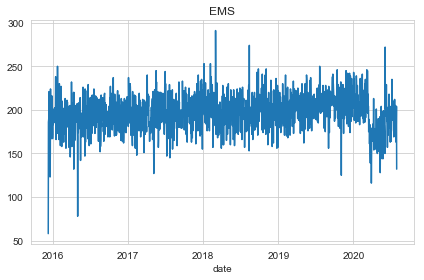

In [38]:
df[df['reason'] == 'EMS'].groupby('date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [53]:
# Now let's move on to creating heatmaps with seaborn and our data. 
# We'll first need to restructure the dataframe so that the columns 
# become the Hours and the Index becomes the Day of the Week. 
# There are lots of ways to do this, but I would recommend trying 
# to combine groupby with an unstack method.

by_dayofweek = df.groupby(by=['dayofweek', 'hour']).count()['lat']
by_dayofweek.head()

dayofweek  hour
Fri        0       1983
           1       1635
           2       1449
           3       1296
           4       1339
Name: lat, dtype: int64

In [54]:
by_dayofweek = by_dayofweek.unstack()
by_dayofweek.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


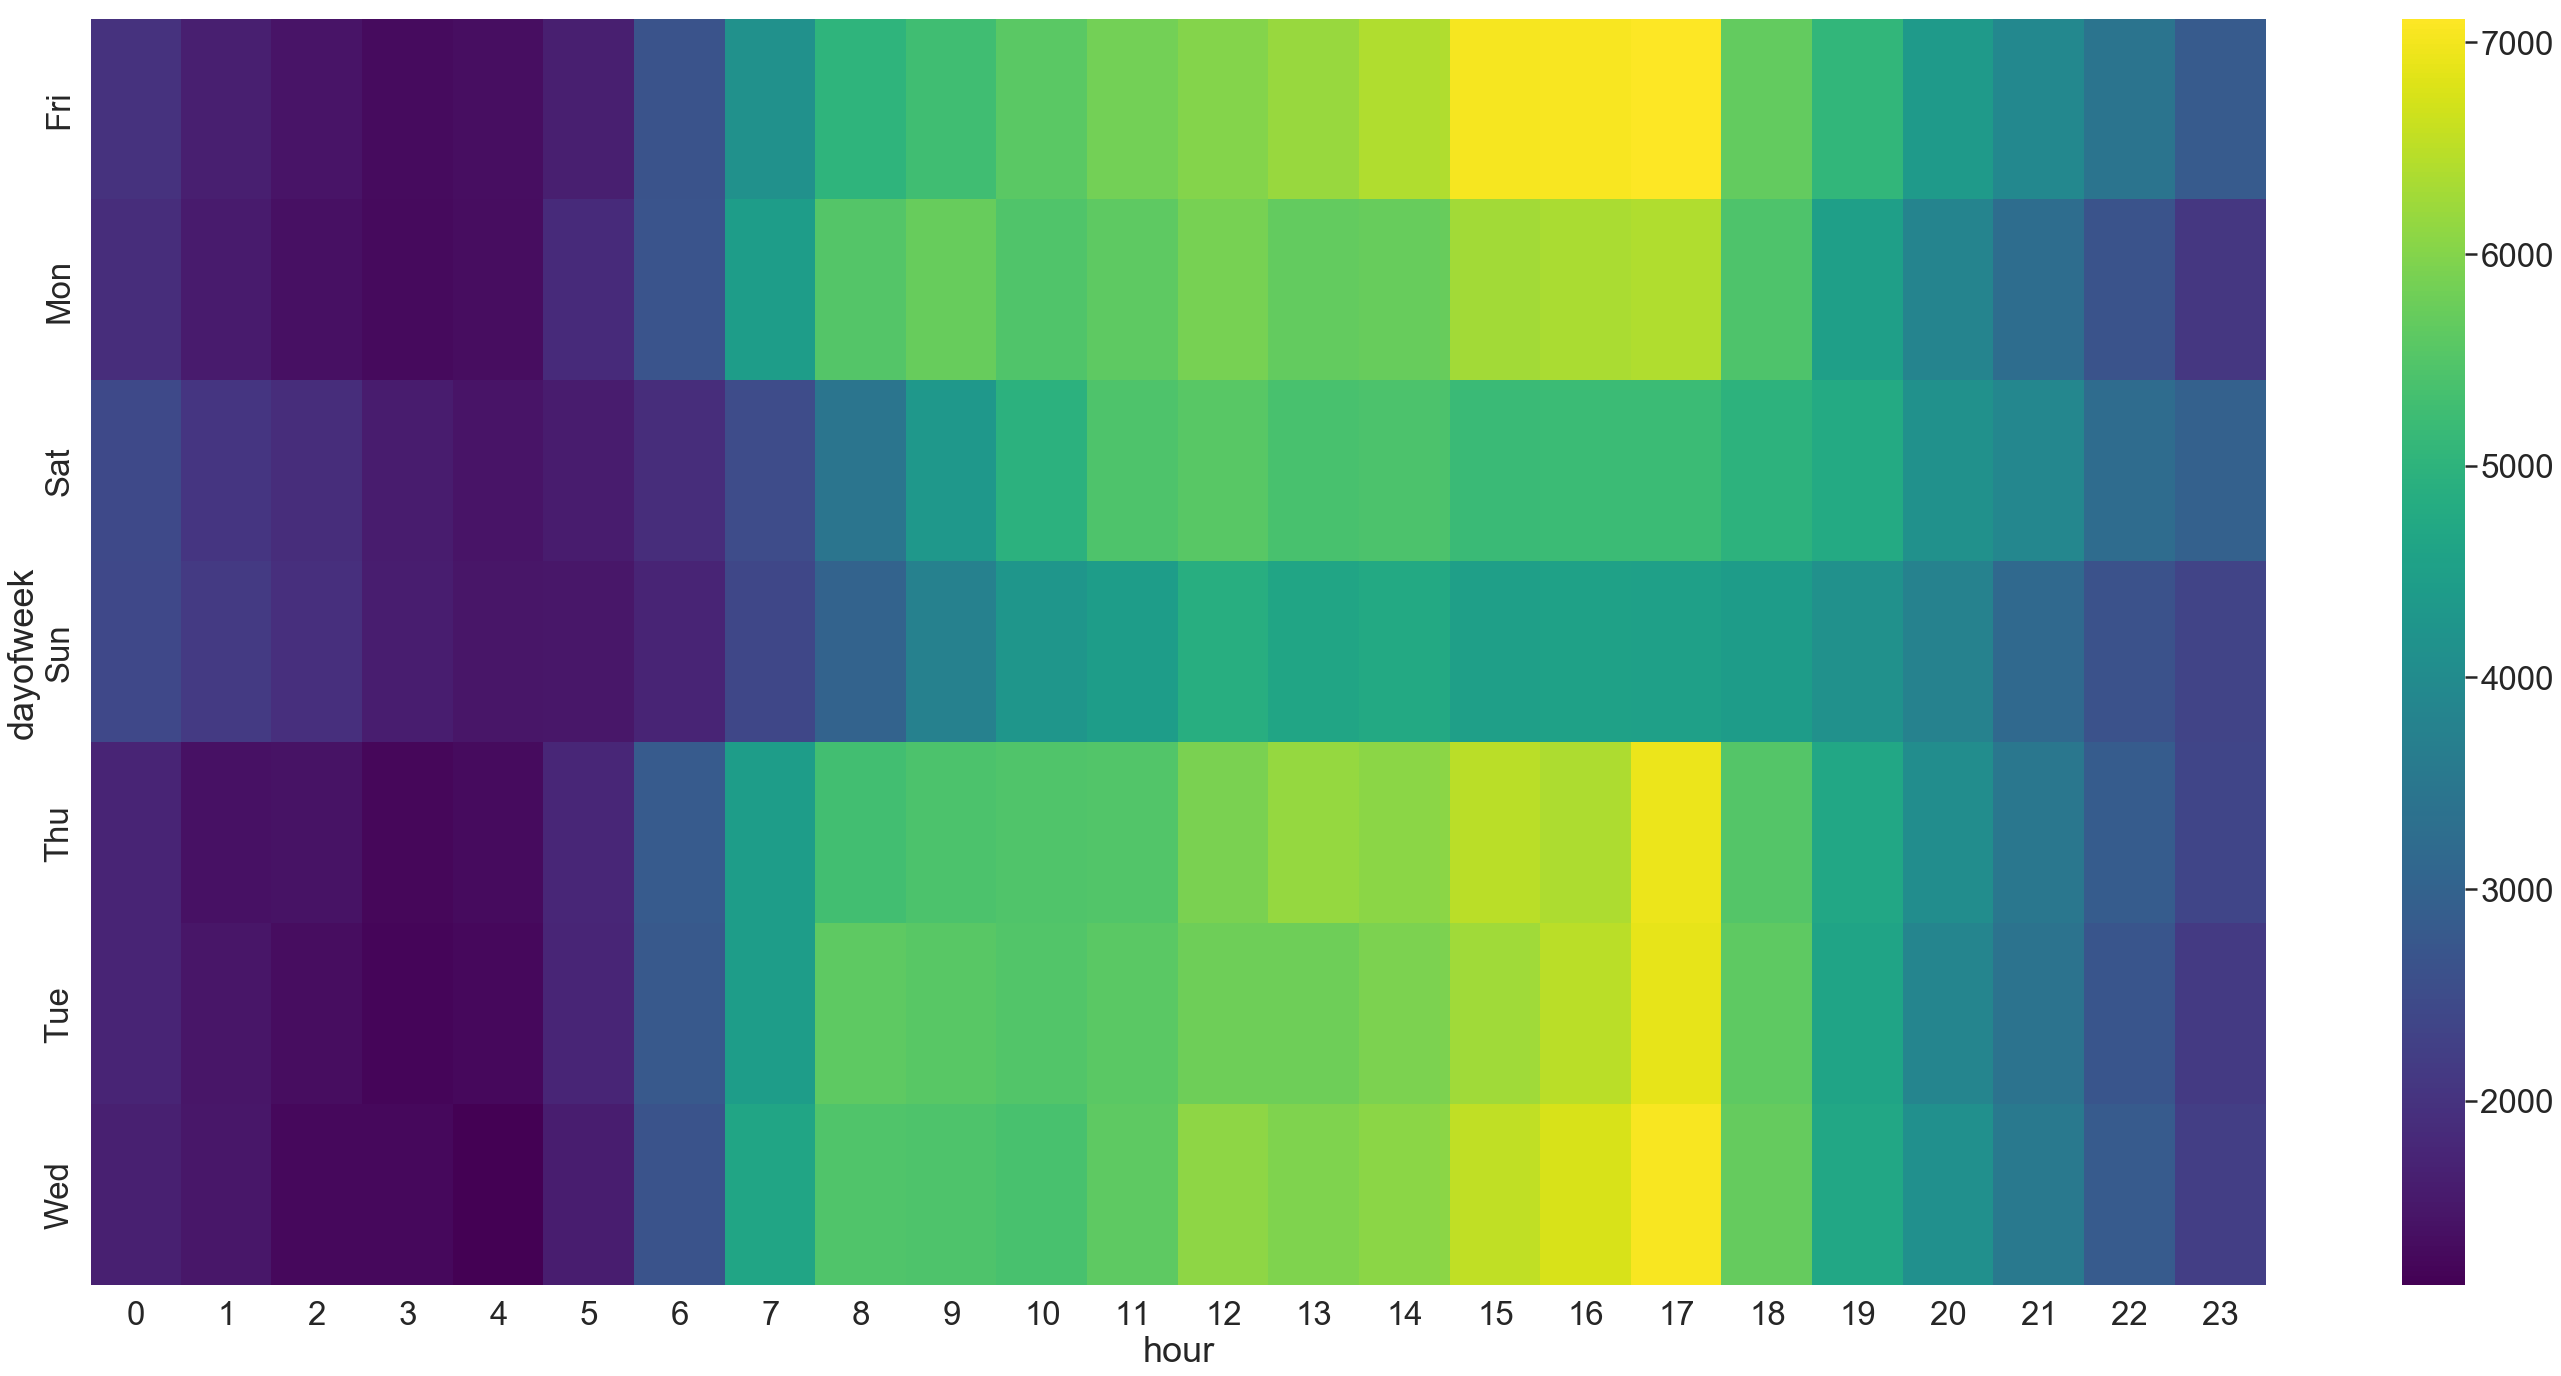

In [64]:
# Now create a HeatMap using this new DataFrame.
plt.figure(figsize=(40, 20))
sns.set_context('poster', font_scale=1.5)
sns.heatmap(data=by_dayofweek, cmap='viridis')
plt.tight_layout()

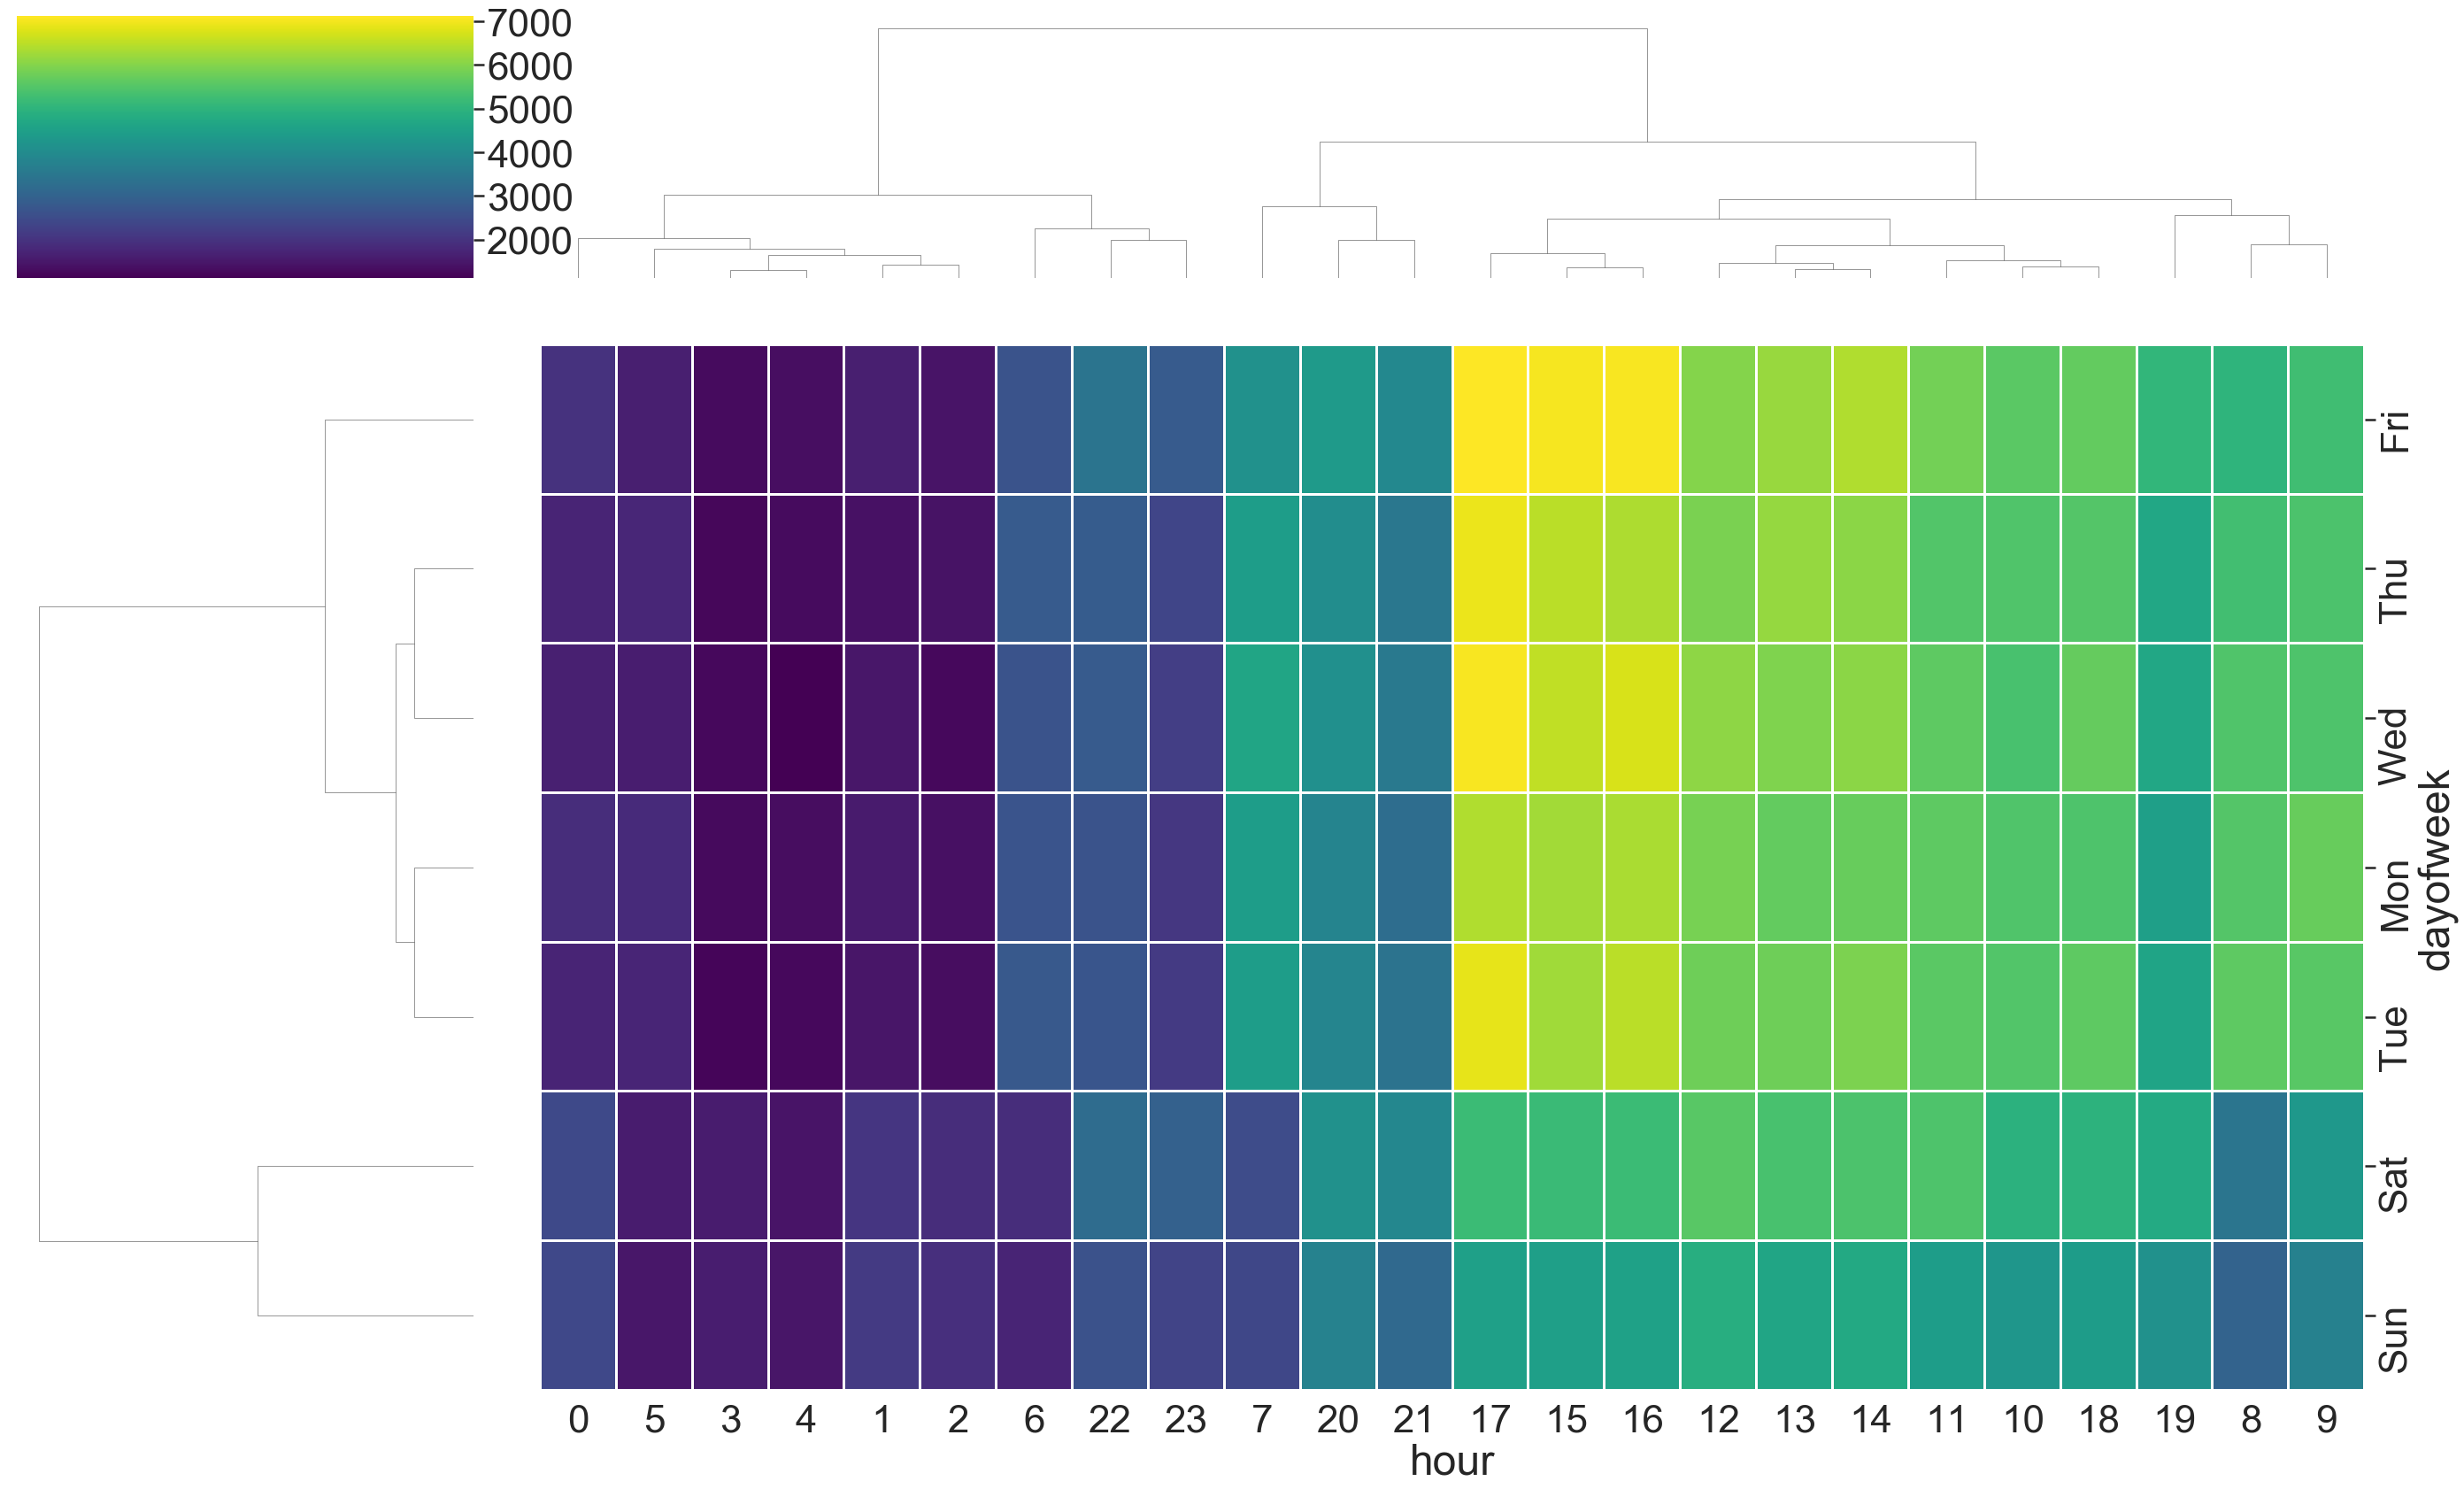

In [74]:
# Now create a clustermap using this DataFrame.
sns.set_context('poster', font_scale=2)
sns.clustermap(data=by_dayofweek, cmap='viridis', figsize=(40, 25), linewidth=2)
plt.tight_layout()

In [75]:
# Now repeat these same plots and operations, 
# for a DataFrame that shows the Month as the column.

by_dayofweek = df.groupby(by=['dayofweek', 'month']).count()
by_dayofweek.head()

lat    lng   desc   zip  title  timeStamp    twp   addr  \
dayofweek month                                                              
Fri       1       9309   9309   9309  8238   9309       9309   9305   9309   
          2       8255   8255   8255  7291   8255       8255   8251   8255   
          3      10941  10941  10941  9745  10941      10941  10932  10941   
          4       7997   7997   7997  7015   7997       7997   7995   7997   
          5       8904   8904   8904  7811   8904       8904   8899   8904   

                     e  reason   hour   date  
dayofweek month                               
Fri       1       9309    9309   9309   9309  
          2       8255    8255   8255   8255  
          3      10941   10941  10941  10941  
          4       7997    7997   7997   7997  
          5       8904    8904   8904   8904

In [76]:
by_dayofweek = by_dayofweek['lat'].unstack()
by_dayofweek.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
dayofweek,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


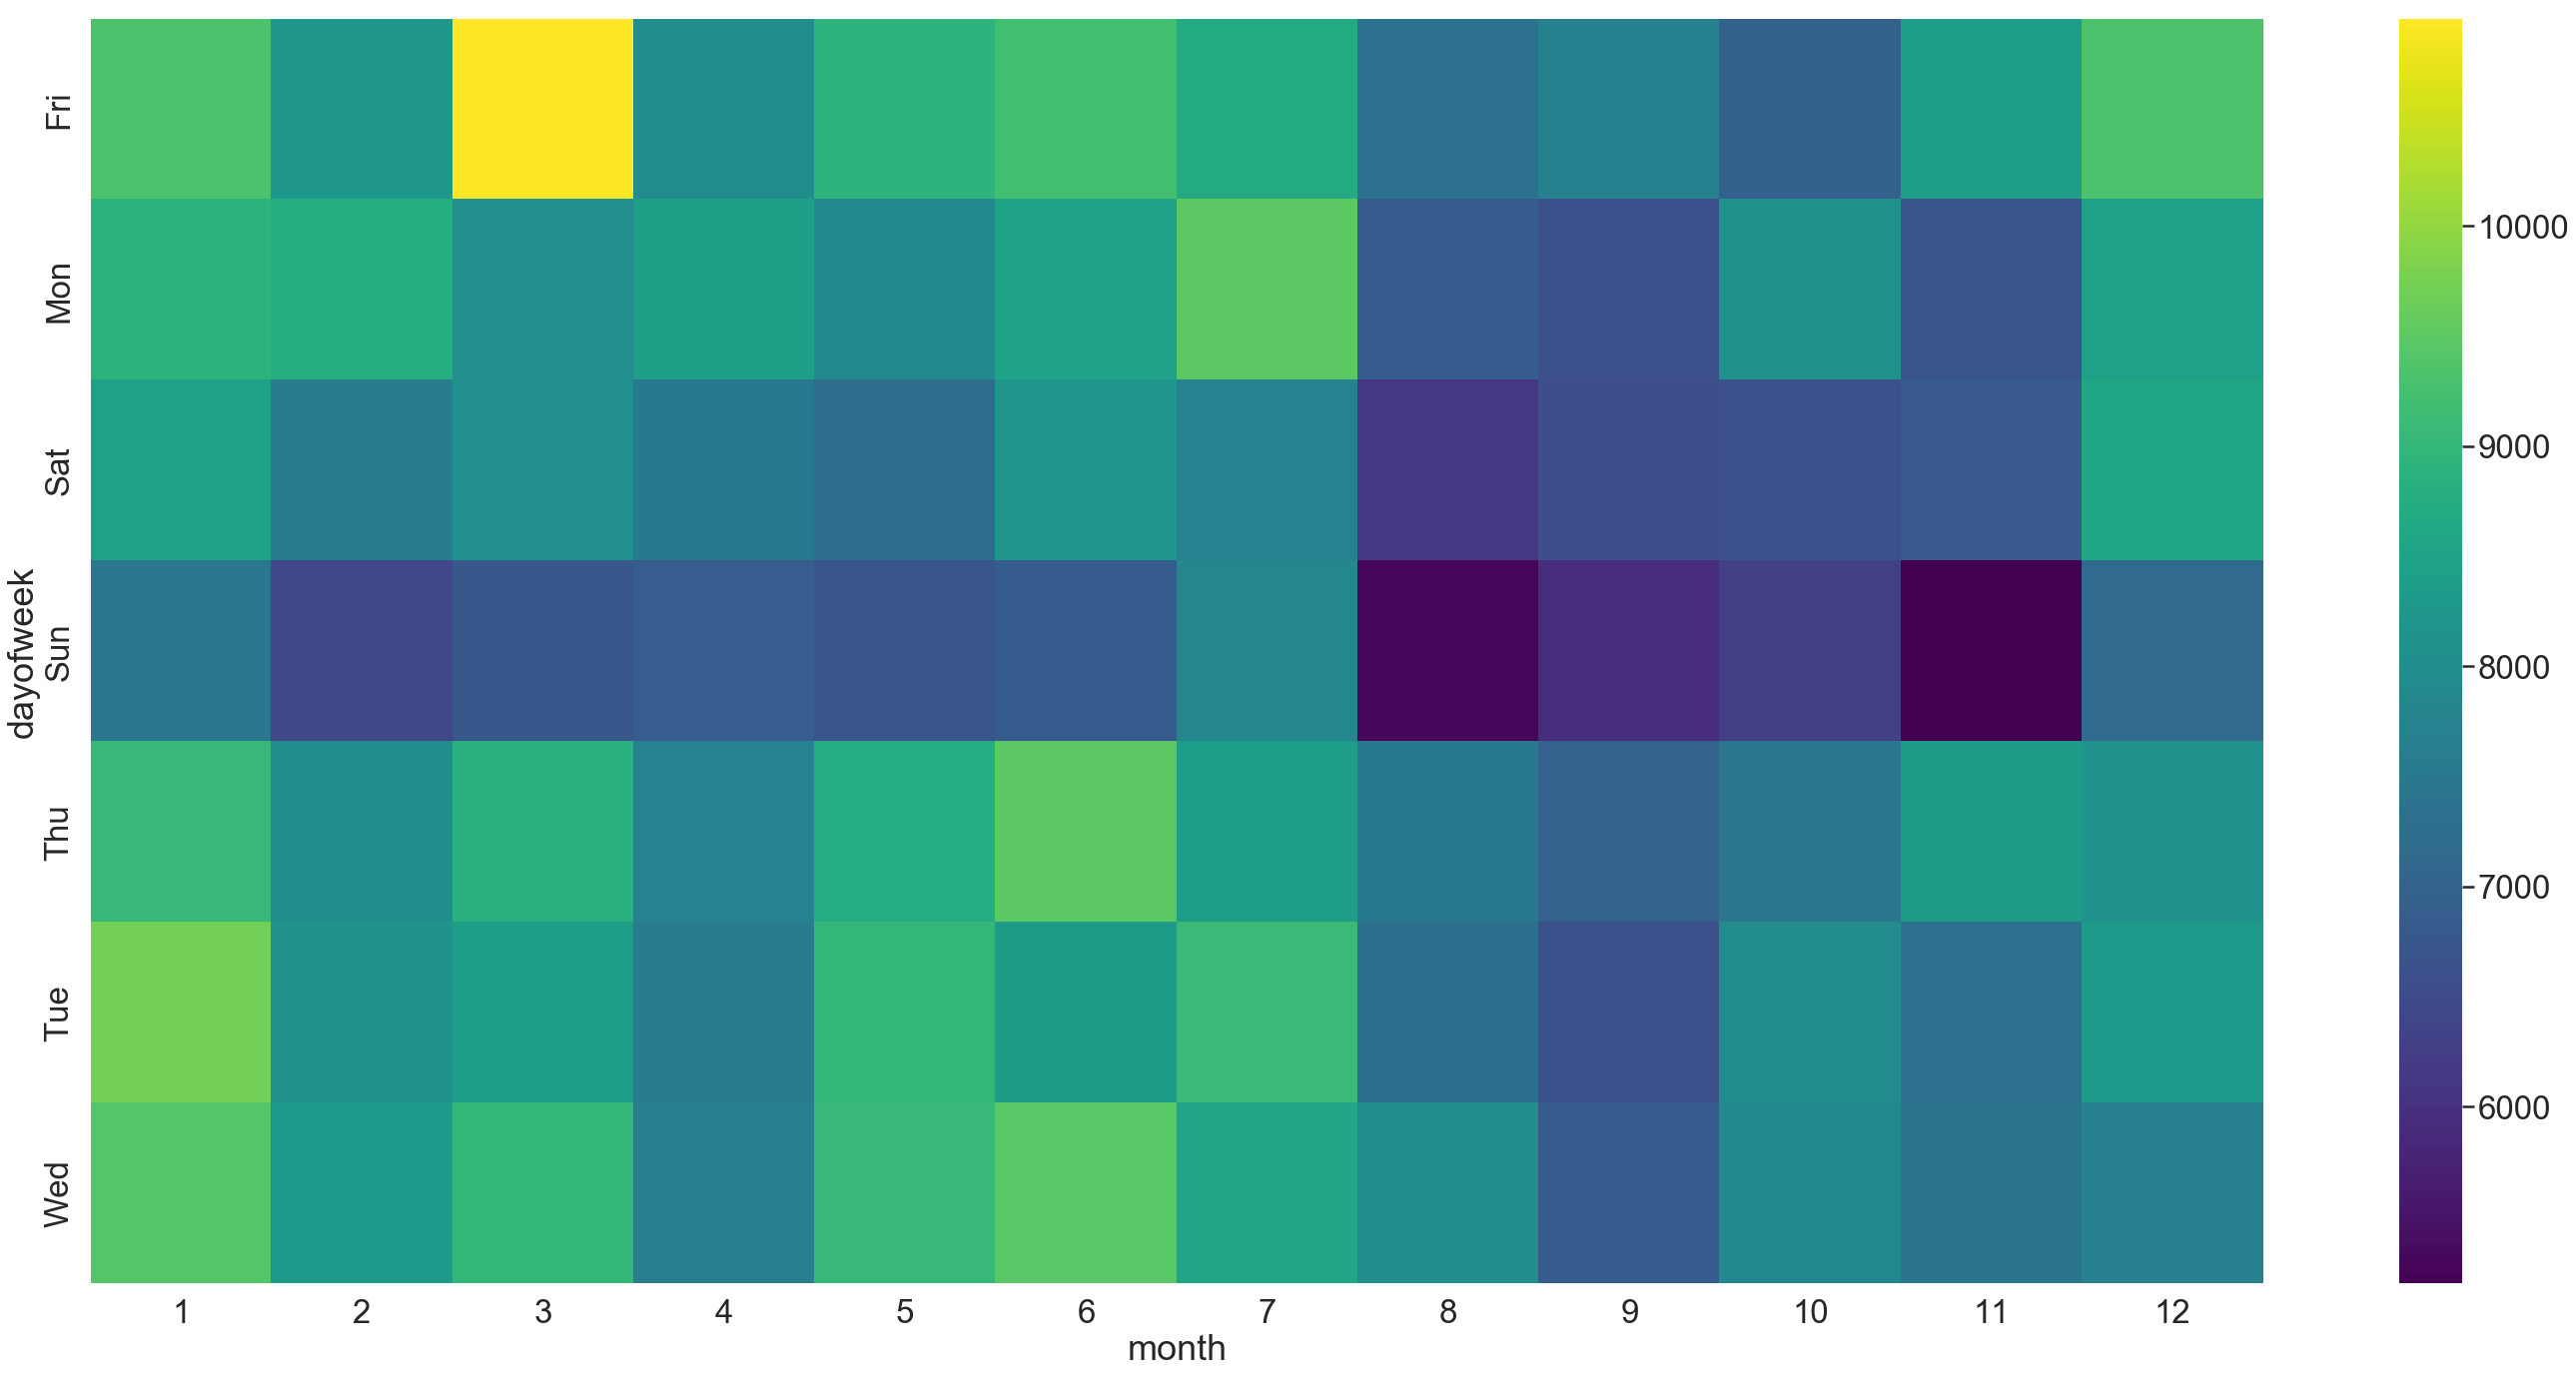

In [77]:
plt.figure(figsize=(40, 20))
sns.set_context('poster', font_scale=1.5)
sns.heatmap(data=by_dayofweek, cmap='viridis')
plt.tight_layout()

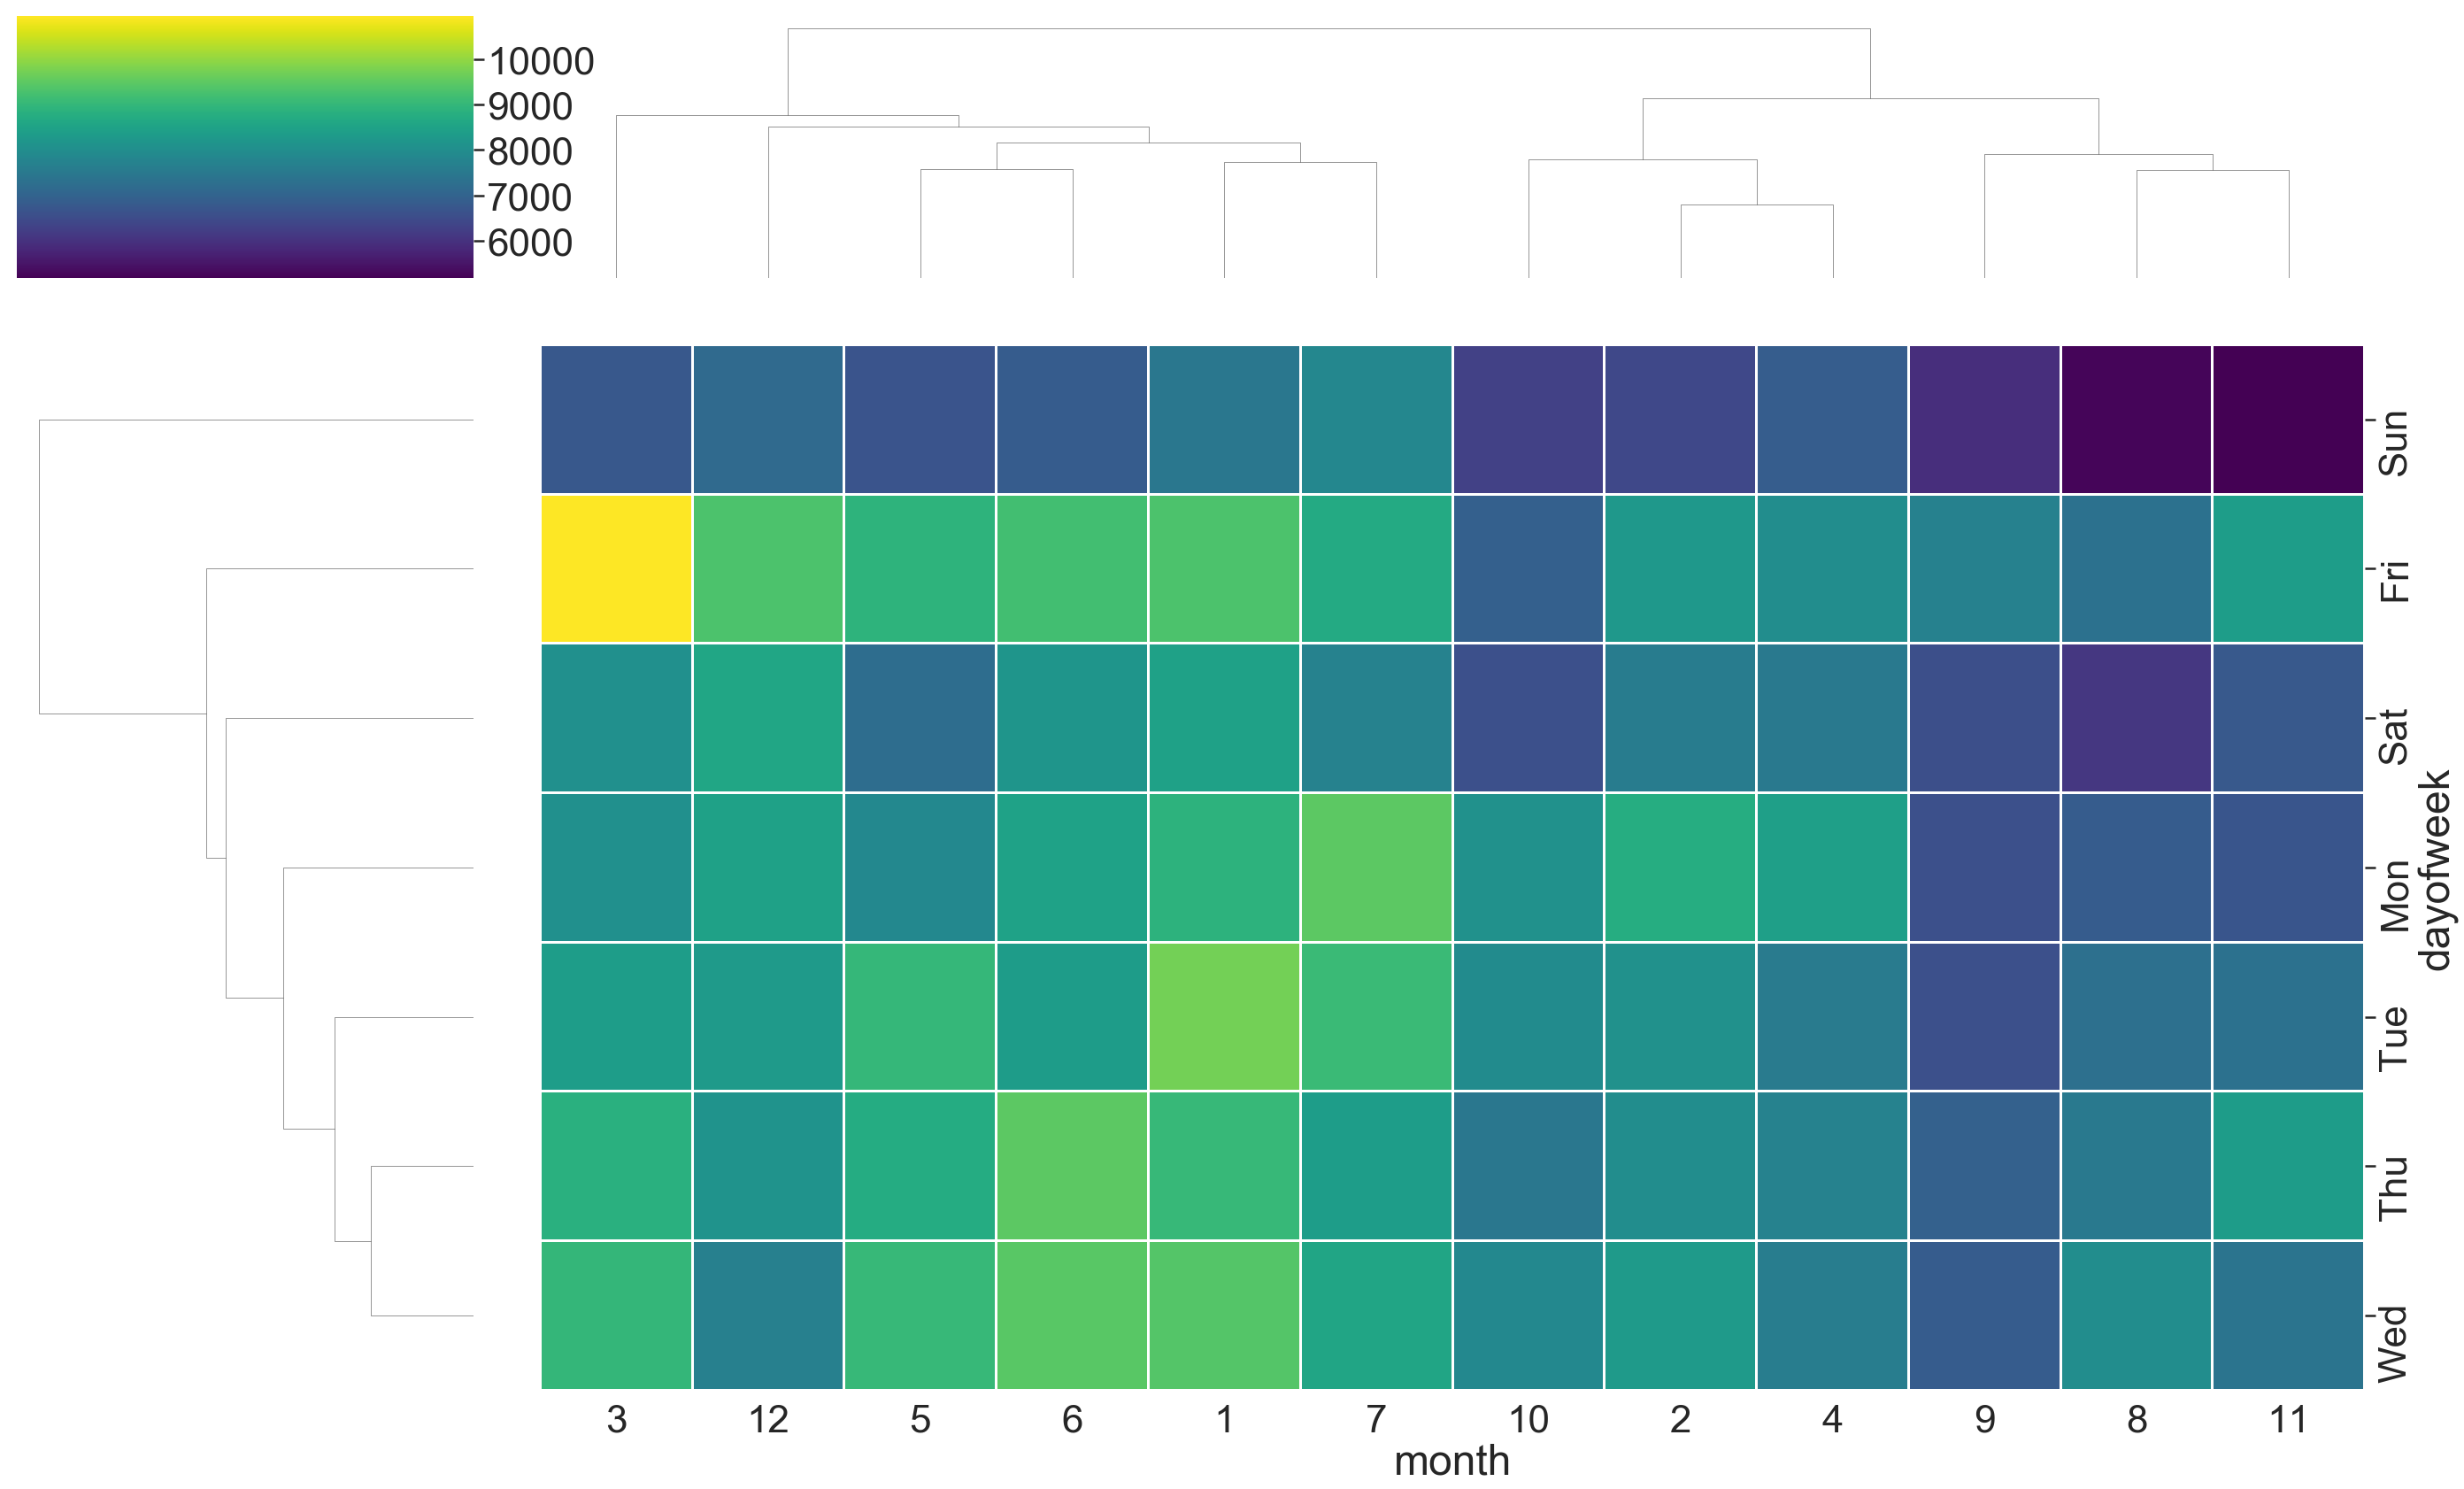

In [78]:
sns.set_context('poster', font_scale=2)
sns.clustermap(data=by_dayofweek, cmap='viridis', figsize=(40, 25), linewidth=2)
plt.tight_layout()